In [78]:
import os
import utils.cop as cop
from utils.data_loader import load_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()
sns.set(font_scale=1.2)



In [4]:

print('hello world')

path = f"./data"
root = './data'
file_list = []
for file in os.listdir(root):
    file_list.append(os.path.join(root, file))

print(file_list)

data = load_data(file_list)

data_left = data[0]
data_right =  data[1]

# c = cop.CenterOfPressure([data_left, data_right])
# print('left: ', c.get_cop_foot('left'))
# print('right: ', c.get_cop_foot('right'))



hello world
['./data\\EHmqKmLHcn_rawDataLeft_S960_20220517.txt', './data\\EHmqKmLHcn_rawDataRight_S960_20220517.txt']
./data\EHmqKmLHcn_rawDataLeft_S960_20220517.txt
./data\EHmqKmLHcn_rawDataRight_S960_20220517.txt


In [47]:
# data_left

# left_data = data[0].iloc[:, 1:15]
# data_sum = left_data.sum(axis=1)
# data_sum


In [49]:
c = cop.CenterOfPressure([data_left, data_right])

In [50]:
left_cop = c.get_cop_foot('left')
right_cop = c.get_cop_foot('right')

(60.0, 75.0)

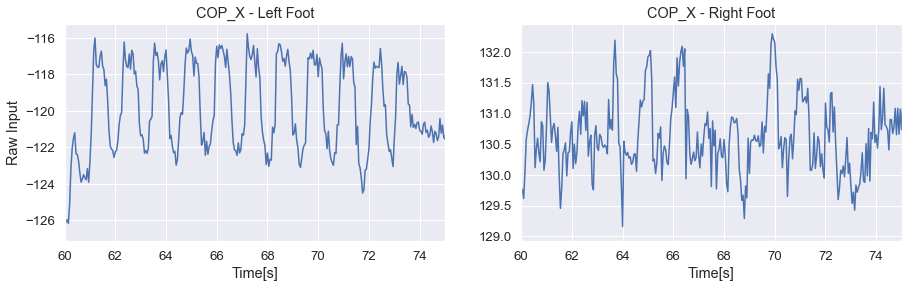

In [79]:
time = [x * 0.05 for x in range(len(left_cop[0]))]
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('COP_X - Left Foot')
plt.plot(time, left_cop[0])
plt.ylabel('Raw Input')
plt.xlabel('Time[s]')
plt.xlim(60,75)
plt.subplot(1,2,2)
plt.title('COP_X - Right Foot')
plt.plot(time, right_cop[0])
plt.xlabel('Time[s]')
plt.xlim(60,75)

c:\Users\joonn\.conda\envs\TF29_PY39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\joonn\.conda\envs\TF29_PY39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(60.0, 75.0)

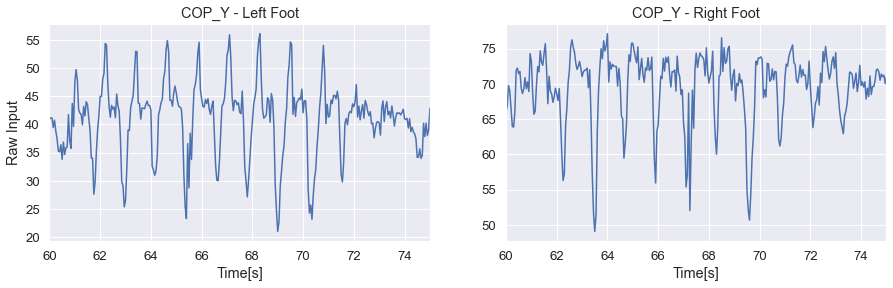

In [80]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('COP_Y - Left Foot')
sns.lineplot(time, left_cop[1])
plt.ylabel('Raw Input')
plt.xlabel('Time[s]')
plt.xlim(60,75)
plt.subplot(1,2,2)
plt.title('COP_Y - Right Foot')
sns.lineplot(time, right_cop[1])
plt.xlabel('Time[s]')
plt.xlim(60,75)

(66.0, 70.0)

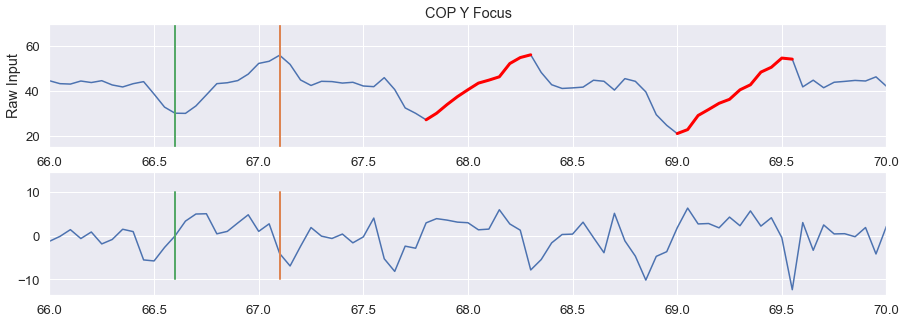

In [154]:
mask = [1356,1367,1380,1392]
left_cop[1][mask]

dummy = np.zeros(len(left_cop[1]))
diff = np.diff(left_cop[1])
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.lineplot(x=time, y=left_cop[1])
sns.lineplot(x=67.1, y=[0,100], estimator=None, linewidth=2)
sns.lineplot(x=66.6, y=[0,100], estimator=None, linewidth=2)
sns.lineplot(x=time[mask[0]:mask[1]], y=left_cop[1][mask[0]:mask[1]], estimator=None, linewidth=3, color='red')
sns.lineplot(x=time[mask[2]:mask[3]], y=left_cop[1][mask[2]:mask[3]], estimator=None, linewidth=3, color='red')
plt.xlabel('Time[s]')
plt.title('COP Y Focus')
plt.ylabel('Raw Input')
plt.ylim(15,70)
plt.xlim(66,70)

plt.subplot(2,1,2)
plt.plot(time[:-1], diff)
sns.lineplot(x=67.1, y=[-10,10], estimator=None, linewidth=2)
sns.lineplot(x=66.6, y=[-10,10], estimator=None, linewidth=2)
plt.xlim(66,70)